## Nettoyage des donnees openfoodfacts


A partir des donnees openfoodfacts, l'idee est de creer une appli qui permettent a un individu ayant des problemes cardiaques ou de diabete ou de cholesterol ou d'hemachromatose, de savoir si le produit qu'il compte prendre lui est prejudiciable et si c'est le cas lui proposer un produit similaire qui lui conviendrait mieux. J'ai choisi de ne pas traiter le cas des allergies car cela depend trop de l'allergie tant par les produits concernes que par le niveau et je ne suis pas medecin.  

L'objectif est de donner un fichier exploitable pour cette appli et de developper precisement le cas de certaines boissons. 

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


Apres avoir ouvert le fichier [Lien](https://static.openfoodfacts.org/data/data-fields.txt) on connait le séparateur utilise pour le csv : tab. et la constitution des colonnes

In [3]:
data=pd.read_csv("C:/Users/leila/Downloads/fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

In [4]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(1831744, 186)

D'apres [Lien](https://wiki.openfoodfacts.org/Data_fields) on sait que l'utilisateur doit rentrer :
- 	Product name
-	Generic name if the user can't use Product name 
-	Quantity
-	Packaging
-	Brands
-	Categories
-	Labels
-	Ingredients
-	Substances or products causing allergies or intolerances (allergens)
-	Traces
-	Serving size

les autres colonnes sont calculées grace à une AI a partir des donnees renseignees.  

La base donnees contient donc des donnees manquantes, des valeurs incoherentes ou mal transcrites. Certains utilisateurs (en tant que producteur d'information de la base de donnees confondent quantite et packaging, ou ne respectent pas ce qui est demande.

Elimination des doublons eventuels

In [6]:
data=data.drop_duplicates()
print(data.shape)

(1831743, 186)


Il n'y avait donc qu'un seul doublon.

### Etude des valeurs manquantes et des repetitions de colonnes

Etudions le pourcentage de remplissage des colonnes. On va creer un dictionnaire dont les cles sont les noms de colonnes et les valeurs le % de valeurs manquantes

In [7]:
na_pct={}
for column in data.columns :
    na_pct[column]=data[column].isnull().sum()*100.0/data.shape[0] 

On cree la liste des colonnes dont le taux de remplissage est <= à 5%

In [8]:
na_sup95=[key for key in na_pct.keys() if na_pct[key]>95]
print(na_sup95)

['abbreviated_product_name', 'packaging_text', 'origins', 'origins_tags', 'origins_fr', 'first_packaging_code_geo', 'cities', 'cities_tags', 'allergens_fr', 'no_nutriments', 'additives', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'e

On ne va pas supprimer toutes les colonnes de na_sup95 pour differentes raisons.
- certaines colonnes peuvent permettent de completer des colonnes ayant des valeurs manquantes en pourcentage plus faibles, comme par exemple "product_name" avec "generic_name" ou "abbreviated_product_name"
- certaines colonnes correspondent a un type particulier de produits comme par exemple la taurine

Pour garder ces colonnes on va creer une liste des colonnes que l'on veut garder la supprimer de na_sup95 pour obtenir la liste des colonnes a supprimer

In [9]:
from collections import Counter
tokeep=['abbreviated_product_name','generic_name','packaging_text','allergens_fr','traces','traces_tags','traces_fr',
        'no_nutriments','additives','ingredients_from_palm_oil','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags','energy-kj_100g','energy-kj_100g','alcohol_100g','caffeine_100g',
 'taurine_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g','fruits-vegetables-nuts-estimate_100g',
        'cocoa_100g']
todel = list((Counter(na_sup95)-Counter(tokeep)).elements()) 
print('liste des colonnes a supprimer : ',todel)

liste des colonnes a supprimer :  ['origins', 'origins_tags', 'origins_fr', 'first_packaging_code_geo', 'cities', 'cities_tags', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'star

on va utiliser un nouveau dataframe sans les colonnes ci-dessus pour ne pas modifier le data de départ

In [10]:
data1=data.drop(todel,axis=1).copy()
data1.shape

(1831743, 95)

On regarde quelles sont les colonnes de data1 n'ayant pas de valeurs manquantes

In [11]:
no_na=[key for key in list(data1.columns) if na_pct[key]==0]
print("colonnes n'ayant aucune valeurs manquantes : ",no_na)

colonnes n'ayant aucune valeurs manquantes :  ['code', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'states', 'states_tags', 'states_fr']


Les trois colonnes contenant "states" nous renseignent si les informations nutritionnelles sont completes ou non, puisqu'il n'y a pas de valeurs manquantes il suffit de garder celle en francais sans perte d'information

In [12]:
data1.drop(['states','states_tags'],axis=1,inplace=True)

Puisqu'il y a des produits pour lesquels on n'a pas le nom dans "product_name", on va tenter de completer si possible cette colonne avec "generic_name" ou abbreviated_product_name" et sinon supprimer les lignes sans nom de produit

In [13]:
#suppression des lignes sans aucune indication sur le nom du produit
no_name=data1.index[((data1['product_name'].isna()) & (data1['generic_name'].isna())&(data1['abbreviated_product_name'].isna()))]
data1.drop(no_name,0,inplace=True)
len(data1)

1753613

In [14]:
#remplir les valeurs manquantes de product-name aves generic name ou abbreviated_product_name
data1['product_name'].fillna(value=data1['generic_name'],inplace=True)
if data1['product_name'].isna().sum()!=0 :
    data1['product_name'].fillna(value=data1['abbreviated_product_name'],inplace=True)
data1['product_name'].isna().sum()

0

On peut donc supprimer les deux colonnes "generic-name" et "abbreviated_product_name" sans perte d'information

In [15]:
data1.drop(['generic_name','abbreviated_product_name'],axis=1,inplace=True)

Parmi les colonnes caractérisant le produit, certaines sont répétitives. Pour limiter le nombre de valeurs manquantes on peut regarder si une colonne semblable est renseignee et remplir alors par cette valeur. C'est le cas pour les colonnes comme nom_col, nom_col_tags et/ou nom_col_fr.
On peut alors supprimer les colonnes répétitives

In [16]:
list_mots_cle=['packaging','brands','categories','labels','countries','allergens','traces','additives', 'main_category']
for mot in list_mots_cle :
    if mot+'_tags'  in list(data1.columns) :
        data1[mot].fillna(value=data1[mot+'_tags'],inplace=True)
        data1.drop([mot+'_tags'],axis=1,inplace=True)
    if mot+'_fr'  in list(data.columns) :
        data1[mot+'_fr'].fillna(value=data1[mot],inplace=True)
        data1.drop([mot],axis=1,inplace=True)

Pour energy_100g, on va garder l'energy en kj car c'est elle qui sert pour le calcul du nutriscore. La conversion calorie en kj est 1kcal=4,18kj (cette conversion n'est pas validee par l'ANIA car elle introduit quelques kj d'ecart par rapport a la conversion en kj de l'apport energetique de chaque nutriment). La colonne energy_100g est en kj et c'est celle que l'on va garder

In [17]:
data1['energy_100g'].fillna(value=data1['energy-kcal_100g']*4.18,inplace=True)
data1['energy_100g'].fillna(value=data1['energy-kj_100g'],inplace=True)
data1.drop(['energy-kcal_100g','energy-kj_100g'],axis=1,inplace=True)

Pour le sel et le sodium, on sait que le sodium est la quantite de sel divisee par 2.5

In [18]:
data1['sodium_100g'].fillna(value=data1['salt_100g']/2.5,inplace=True)
data1.drop(['salt_100g'],axis=1,inplace=True)

Pour les colonnes concernant l'huile de palme et celles concernant fruits-legumes_noix :

In [19]:
#huile de palme
data1['ingredients_from_palm_oil_n'].fillna(value=data1['ingredients_that_may_be_from_palm_oil_n'],inplace=True)
data1.drop(['ingredients_from_palm_oil','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil',
            'ingredients_that_may_be_from_palm_oil_tags'],axis=1,inplace=True)

#fruits-legumes-noix
data1['fruits-vegetables-nuts_100g'].fillna(value=data1['fruits-vegetables-nuts-estimate_100g'],inplace=True)
data1.drop(['fruits-vegetables-nuts-estimate_100g'],axis=1,inplace=True)

On supprime les colonnes qui ne présentent pas reellement d'interet comme : 'creator', 'created_t', 'created_datetime', 'last_modified_t' etc..

In [20]:
data2=data1.drop(['creator', 'created_t', 'created_datetime', 'last_modified_t','brand_owner','stores',
                 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url',
                  'image_nutrition_url', 'image_nutrition_small_url','manufacturing_places_tags','packaging_text','emb_codes_tags'],axis=1)
print('dimensions data2 : ',data2.shape)
print('liste colonnes data2 : ',data2.columns)

dimensions data2 :  (1753613, 53)
liste colonnes data2 :  Index(['code', 'url', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'brands', 'categories_fr', 'manufacturing_places',
       'labels_fr', 'emb_codes', 'purchase_places', 'countries_fr',
       'ingredients_text', 'allergens_fr', 'traces_fr', 'serving_size',
       'serving_quantity', 'no_nutriments', 'additives_n', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states_fr',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
       'caffeine_100g', 'taurine_100g', 'fruits-vegetables-nuts_100g

Nous allons regarder les colonnes categories_fr et main_category_fr d'une part et d'autre part pnns_groups_1 et pnns_groups_2.
Programme National Nutrition Sante a defini des groupes alimentaires qui categorisent les aliments, par exemple le groupe des boissons sucrees, le groupe des legumes, etc... Le groupe pnns_groups_2 est plus tardif et plus precis que le 1 donc il est a priori preferable de garder le 2.
La difference entre categories et main_category est que dans main_category on sait dans quelle langue la categorie est ecrite si ce n'est pas en francais.

In [21]:
((data2['categories_fr'].notna())|(data2['main_category_fr'].isna())).sum()

1753613

Donc data2['categories_fr']= NAN =>data2['main_category_fr']=NAN. On peut donc supprimer la colonne categories_fr.

In [22]:
#suppression de la colone categories_fr
data2.drop(['categories_fr'],axis=1,inplace=True)

#lorsque pnns_groups_2 est inconnu en est-il de meme pour pnns_groups_1
print('pnns_groups_2 = unknown => pnns_groups_1 = ',data2[data2['pnns_groups_2']=='unknown']['pnns_groups_1'].unique())

#est ce que pnns_groups_2 = Nan et pnns_groups_1 = not Nan existe
(data2['pnns_groups_1'].notna()&data2['pnns_groups_2'].isna()).sum()

pnns_groups_2 = unknown => pnns_groups_1 =  ['unknown']


0

On peut donc supprimer la colonne pnns_groups_1

In [23]:
data2.drop(['pnns_groups_1'],axis=1,inplace=True)

On va normaliser les chaines dans les colonnes concernees donc en particulier supprimer les accents et mettre tout en minuscules

In [24]:
cols = data2.select_dtypes(include=[np.object]).columns
data2[cols] = data2[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower())

Representation du taux de remplissage des produits ne concernant pas les nutriments

colonnes ne concernant pas les nutriments : ['code', 'url', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'brands', 'manufacturing_places', 'labels_fr', 'emb_codes', 'purchase_places', 'countries_fr', 'ingredients_text', 'allergens_fr', 'traces_fr', 'serving_size', 'serving_quantity', 'additives_n', 'additives_fr', 'ingredients_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_2', 'states_fr', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category_fr']


Text(0.5, 1.0, 'Pourcentage de produit suivant le taux de remplissage')

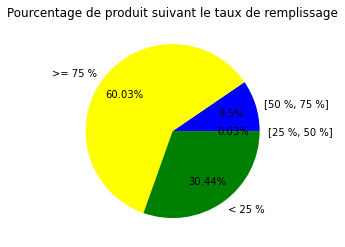

In [25]:
#nom des colonnes ne concernant pas les nutriments
choix_col=[col for col in data2.columns if (not col.endswith('_100g')) and (col!='no_nutriments')]
print('colonnes ne concernant pas les nutriments :',choix_col)

#utilisation d'un data temporaire pour calculer le taux de remplissage des colonnes ci-dessus
tp=data2[choix_col].copy()
tp['taux_fill_line_choix']=tp.notna().sum(axis=1)*100/len(choix_col)


# repartition des intervalles de remplissage
tp['repartition']='>= 75 %'
tp.loc[tp['taux_fill_line_choix']<25.,'repartition']='< 25 %'
tp.loc[((tp['taux_fill_line_choix']>=25.)&(tp['taux_fill_line_choix']<50.)),'repartition']='[25 %, 50 %]'
tp.loc[((tp['taux_fill_line_choix']>=50.)&(tp['taux_fill_line_choix']<75.)),'repartition']='[50 %, 75 %]'

trl=tp.groupby(['repartition'])
nb_prod=trl.size()

plt.pie(nb_prod,labels=tp['repartition'].unique(),colors=['red','blue','yellow','green'],
        autopct=lambda x: str(round(x,2))+'%',pctdistance=0.7,labeldistance=1.1)
plt.title('Pourcentage de produit suivant le taux de remplissage')

Etude des valeurs manquantes pour les colonnes numeriques

In [26]:
nutrition = [c for c in data2.columns if c.endswith('_100g')]
df=data2[nutrition].isnull().all(axis=1)
print("{} produits n'ont aucune indication sur la nutrition,soit {}% of the data".format(df.sum(),
                                                                                         round(df.sum()*100/data2.shape[0],2))) 

269265 produits n'ont aucune indication sur la nutrition,soit 15.35% of the data


A ce stade, il n'est pas raisonnable de supprimer ces produits. Il ne semble pas opportun de remplacer les valeurs manquantes par la moyenne de la colonne car cela dépend des categories de produits, de la distribution et donc cela fausserait les donnees. 
Tant que nous n'avons pas fait d'analyse exploratoire il est préférable de garder les valeurs manquantes. 

### Recherche des valeurs atypiques

Les valeurs pour toutes les colonnes se terminant par 100g, sauf le nutriscore, doivent être positives. 
En dehors de nutriscore et de energy, toutes les valeurs doivent être inférieures à 100 sauf le sodium qui est en mg 


In [27]:
dfnut=data2[nutrition].copy()
dfnut.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,...,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,caffeine_100g,taurine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,cocoa_100g,nutrition-score-fr_100g
count,1.446680e+06,1.438913e+06,1.397221e+06,264353.000000,268101.000000,1.438369e+06,1.421781e+06,473342.000000,1.440015e+06,1.381179e+06,...,219802.000000,91916.000000,269776.000000,264450.000000,451.000000,179.000000,20314.000000,366.000000,5987.000000,674168.000000
mean,2.514501e+07,1.471523e+01,1.231094e+01,0.123427,0.048566,2.883200e+01,1.400085e+01,5.137584,8.778560e+00,1.152490e+00,...,0.029882,0.442280,0.186402,0.013836,2.189448,3.346184,41.131018,18.149646,52.211466,9.163361
std,3.024251e+10,8.570785e+02,8.459963e+03,29.088115,1.393222,6.459199e+02,8.389482e+02,1453.505827,1.457520e+02,3.447389e+02,...,1.244830,7.804146,5.597001,2.070782,24.576021,30.246968,32.786240,32.053323,22.705211,8.871681
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-20.000000,-5.000000e+02,0.000000e+00,...,0.000000,0.000000,0.000000,-0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,4.180000e+02,7.700000e-01,1.000000e-01,0.000000,0.000000,3.500000e+00,6.000000e-01,0.000000,1.300000e+00,2.800000e-02,...,0.000000,0.080000,0.000000,0.000000,0.015700,0.036000,9.000000,0.000000,32.800000,2.000000
50%,1.085000e+03,7.000000e+00,1.800000e+00,0.000000,0.000000,1.508000e+01,3.570000e+00,1.600000,6.000000e+00,2.240000e-01,...,0.000000,0.167000,0.036000,0.001000,0.032000,0.372000,44.800000,0.000000,53.000000,10.000000
75%,1.674000e+03,2.140000e+01,7.140000e+00,0.000000,0.022000,5.300000e+01,1.800000e+01,3.600000,1.230000e+01,5.600000e-01,...,0.004000,0.300000,0.110000,0.002410,0.044000,0.400000,62.275000,19.500000,70.000000,16.000000
max,3.637509e+13,9.999990e+05,9.999999e+06,14800.000000,141.000000,7.629390e+05,9.999990e+05,999999.000000,1.730000e+05,3.999996e+05,...,430.000000,875.000000,930.000000,940.000000,500.000000,400.000000,100.000000,100.000000,100.000000,40.000000


La ligne max ci-dessus montre des valeurs pour le moins curieuses.

Visualisation des valeurs atypiques

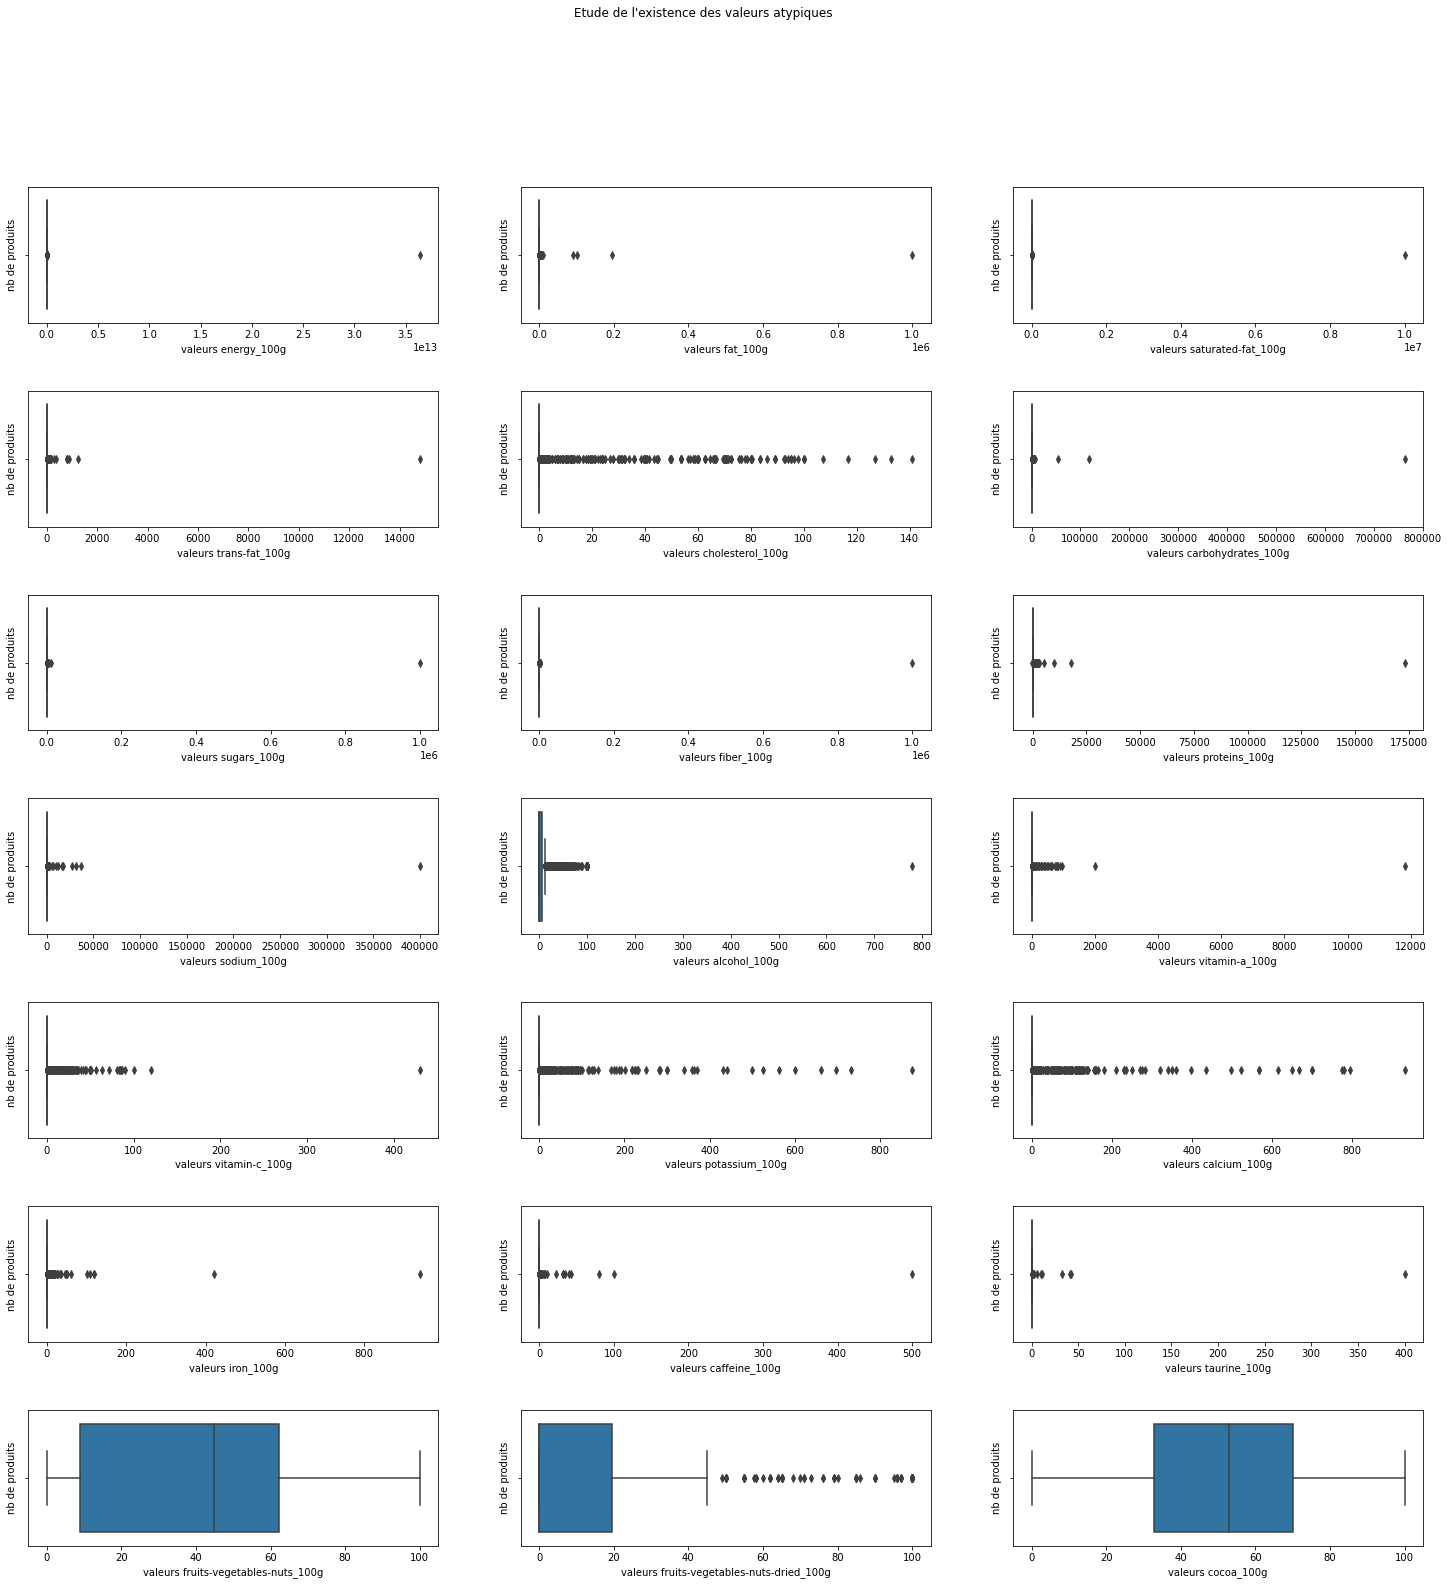

In [28]:
ngraphe=len(dfnut.columns)-1
nrows=ngraphe//3
ncols=3
plt.figure(figsize=(25,25))
plt.suptitle("Etude de l'existence des valeurs atypiques" )
plt.gcf().subplots_adjust(hspace=0.5)

for k in range(len(dfnut.columns)-1) :
    plt.subplot(nrows,ncols,k+1)
    sns.boxplot(x=dfnut[nutrition[k]])
    plt.xlabel('valeurs '+nutrition[k])
    plt.ylabel('nb de produits')
plt.show()    



D'apres les graphes on constate la presence de valeurs atypiques.  
On remplace les valeurs atypiques par des Nan, ce qui evite de supprimer des produits

In [29]:
for col in dfnut.columns :
    if col !='nutrition-score-fr_100g':
        data2.loc[data2[col]<0,col]=np.nan
    if col != 'energy_100g':
        data2.loc[data2[col]>100,col]=np.nan
        

Pour le sodium, etant donné que c'est la quantite de sel / 2.5, pour 100g la valeur max du sodium doit être 40.

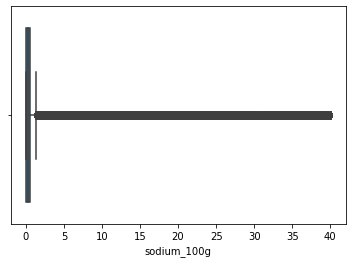

In [30]:
data2.loc[data2['sodium_100g']>40.,'sodium_100g']=np.nan
sns.boxplot(x=data2['sodium_100g'])
plt.show()

Pour energy_100g, on peut utiliser les quantiles pour fixer la valeur max. On choisit d'utiliser le quantile 0.9 comme valeur max ce qui signifie que 90% des produits de la base de donnes de depart ont une valeur energetique inferieure a cette valeur max.

In [31]:
qmx=data2['energy_100g'].quantile(0.9)
data2.loc[data2['energy_100g']>qmx,'energy_100g']=np.nan
data2['energy_100g'].describe()


count    1.302919e+06
mean     9.712359e+02
std      6.464800e+02
min      0.000000e+00
25%      3.690000e+02
50%      9.580000e+02
75%      1.531000e+03
max      2.201000e+03
Name: energy_100g, dtype: float64

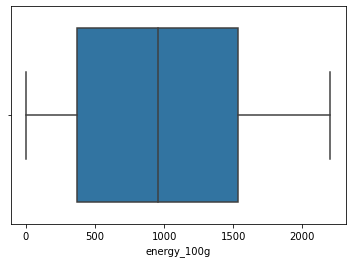

In [32]:
sns.boxplot(x=data2['energy_100g'])
plt.show()

### Creation du dataframe des produits vendus en France

On s'interesse aux produits vendus en France 

In [33]:
# fonction permettant de creer une liste de mots choisis
def choix(x,liste):
    return [z for z in liste if x in z]

pays=list(data2[data2['countries_fr'].notna()]['countries_fr'].unique())
dfr=data2[data2['countries_fr'].isin(choix('france',pays))].copy()
dfr.shape

(789751, 51)

On supprime les produits non alimentaires

In [34]:
non_ali=["calendriers de l'avent",'non alimentaire','open beauty facts']
dfr.drop(dfr.index[dfr['main_category_fr'].isin(non_ali)],axis=0,inplace=True)
dfr.shape        

(788968, 51)

Etudions les colonnes main_category et pnns_groups dans le but de creer une colonne categorie plus simple

In [35]:
lm=list(dfr['main_category_fr'].unique())
lpn=list(dfr['pnns_groups_2'].unique())
print('len(lm) :', len(lm))
print('len(lpn) :', len(lpn))

len(lm) : 17643
len(lpn) : 41


In [36]:
#on teste si lorque l'on ne connait pas le pnns_groups on a un renseignement dans main_category
((dfr['pnns_groups_2']=='unknown')&(dfr['main_category_fr'].notna())).sum()

42487

On utilise un dataframe reduit afin de pouvoirplus rapidement creer une colonne categorie significative et avec moins de valeurs inconnues que pnns_groups_2

In [37]:
d=dfr[((dfr['pnns_groups_2']=='unknown')&(dfr['main_category_fr'].notna()))].copy()


Classement des mots dans main_category_fr de d

In [38]:
def mot_commun(labels, sep=","):
    mots=[]
    for lab in labels:
        mots+=str(lab).split(sep)
    count=Counter(mots)
    print([mot for mot in count.most_common(50)])
       
print("mot et nombre d'utilisations dans d : ")
mot_commun(d['main_category_fr'], sep=',')


mot et nombre d'utilisations dans d : 
[('boissons', 1628), ('boissons sans sucre ajoute', 825), ('complements alimentaires', 760), ('cafes', 744), ('beignets sucres', 632), ('infusions', 617), ('spiruline', 532), ('snacks', 445), ('barres proteinees', 433), ('snacks sales', 400), ('cremes de marrons', 343), ('epices', 337), ('cafes en dosettes', 327), ('condiments', 326), ('snacks sucres', 323), ('thes verts', 315), ('boissons avec sucre ajoute', 307), ("sirops d'erable", 301), ('assaisonnements', 299), ('mousses au chocolat', 292), ('galettes de ble noir', 290), ('desserts', 288), ('cafes moulus', 288), ('graines de tournesol', 287), ('grains de cafe', 285), ('cafes solubles', 283), ("melanges d'epices", 277), ('produits laitiers', 271), ('chocolats en poudre', 268), ('cafes en dosettes compatible nespresso', 243), ('des 6 mois', 230), ('proteines en poudre', 217), ('amandes en poudre', 217), ('crepes de froment', 215), ('crepes', 204), ('thes', 203), ('cremes de vinaigre', 202), ('c

Nous allons creer une colonne categorie plus simple a partir de mot_commun et pnns_groups

In [39]:
dico_cat ={
    'boissons' : ['sweetened beverages','fruit nectars','artificially sweetened beverages', 'alcoholic beverages',
                                            'waters and flavored waters','teas and herbal teas and coffees',
                                           'unsweetened beverages','fruit juices','sirops','boissons','cafes','thes',
                  'infusions'],
    'fromages' : ['cheese'],
    'fruits' : [ 'fruits','dried fruits'],
    'legumes' : ['legumes', 'vegetables'],
    'cakes' : ['biscuits and cakes', 'sweets','gateaux','beignets sucres','crepes','desserts'],
    'cereales' : ['cereals', 'breakfast cereals' ],
    'noix' : ['nuts'],
    'snacks':['sandwiches','one-dish meals','pizza pies and quiche','snacks', 'barres proteinees','snacks sales',
              'pizza pies and quiches'],
    'viandes-poissons' : ['processed meat', 'meat','fish and seafood'],
    'fats' : ['salty and fatty products', 'fats'],
    'laits' : ['milk and yogurt', 'ice cream','laits','cremes','plant-based milk substitutes','dairy desserts'],
    'epicerie':['dressings and sauces','pastries','epices','condiments','sels' ],
    'autres':['bread', 'appetizers', 'chocolate products', 'eggs', 'soups', 'potatoes', 'offals']
}

def compare_mot(mot):
    if mot == ' 'or mot == 'nan':
        pass
    for key, val in dico_cat.items():
        if mot in val:
            return key 
    return None


def apply_new_cat (data, col='main_category_fr',sep=','):
    list_column=[]
    for lab in data[col]:
        list_prov= []
        s=None
        for m in str(lab).split(sep):
            s=compare_mot(m)
            if s != None:
                break
                        
        list_column.append(s)
        
    data['categorie'] = list_column

dtest=dfr.copy() #on utilise un nouveau dataframe pour ne pas modifier dfr s'il y a des erreurs dans le code

#creation de la colonne categorie pour dtest a partir du pnns_groups_2
apply_new_cat(dtest, col='pnns_groups_2',sep=',')
#creation de la colonne categorie pour d a partir de main_category_fr pour pouvoir un peu completer dtest['categorie']
apply_new_cat(d,col='main_category_fr',sep=' ')


In [40]:
print("nombre de produits de groupe pnns connus : ",(dtest['pnns_groups_2']!='unknown').sum())

dtest.loc[((dtest['pnns_groups_2']=='unknown')&(dtest['main_category_fr'].notna())),'categorie']=d['categorie']

dtest[['pnns_groups_2','main_category_fr','categorie']].info()

nombre de produits de groupe pnns connus :  328202
<class 'pandas.core.frame.DataFrame'>
Int64Index: 788968 entries, 0 to 1831743
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   pnns_groups_2     788968 non-null  object
 1   main_category_fr  370689 non-null  object
 2   categorie         341950 non-null  object
dtypes: object(3)
memory usage: 24.1+ MB


On pourrait encore ameliorer la situation si necessaire en utilisant plus de mots du dictionnaire.

Nous allons maintenant nous interesser au nutriscore et au grade

In [41]:
dtest[['nutriscore_score','nutrition-score-fr_100g']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788968 entries, 0 to 1831743
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nutriscore_score         287551 non-null  float64
 1   nutrition-score-fr_100g  287554 non-null  float64
dtypes: float64(2)
memory usage: 18.1 MB


In [42]:
nutriscore=dtest[dtest['nutrition-score-fr_100g'].notna()]
nutriscore[nutriscore['nutriscore_score'].isna()][nutrition]

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,...,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,caffeine_100g,taurine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,cocoa_100g,nutrition-score-fr_100g
526291,1084.0,10.0,5.3,NaN,NaN,30.0,4.5,NaN,11.0,0.511811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
611544,NaN,45.0,27.0,NaN,NaN,27.0,27.0,0.0,8.8,0.011800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1809088,NaN,50.5,8.2,NaN,NaN,16.8,5.1,NaN,20.9,0.570866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


on peut donc supprimer la colonne nutriscore_score

In [43]:
dtest.drop(['nutriscore_score'],axis=1,inplace=True)

Le calcul du nutriscore est expliqué ici [Lien](https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score)  
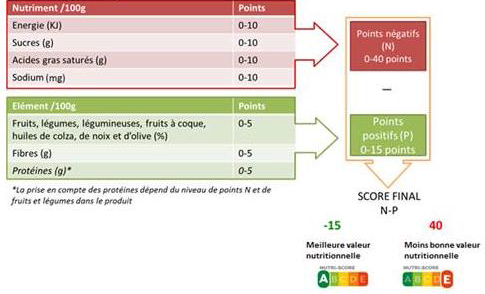

En résumé, le calcul des points positifs et negatifs varient selon trois classes d'elements :
- le cas general
- les fromages
- les boissons

Le grade est obtenu a partir du nutriscore suivant le tableau ci-dessous
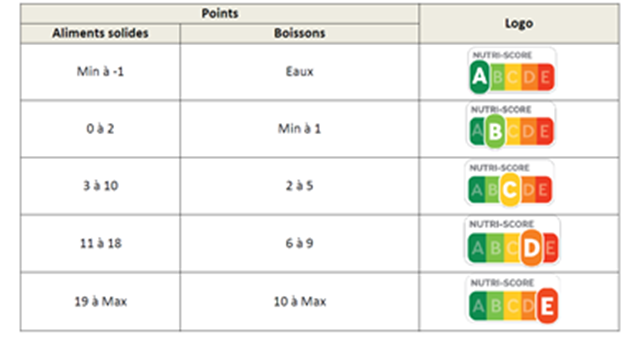


Regardons les valeurs max des nutriscores par rapport aux grades

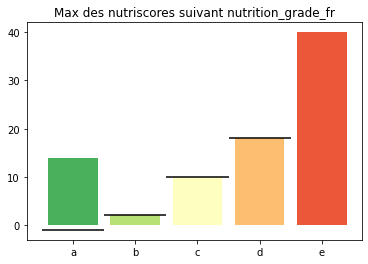

In [44]:
nutri_grade=dtest.loc[:,['nutriscore_grade', 'nutrition-score-fr_100g']].groupby('nutriscore_grade').agg(['max'])
plt.title('Max des nutriscores suivant nutrition_grade_fr')
palette = sns.color_palette("RdYlGn", 5)
legend = {'e': palette[0], 'd': palette[1], 'c': palette[2], 'b':palette[3], 'a':palette[4]}
y1=nutri_grade['nutrition-score-fr_100g']['max']
plt.bar(nutri_grade.index, y1,color=palette[::-1] )
#barres des max
pos=0
for k in [-1,2,10,18] :
    plt.hlines([k],xmin=pos-0.50,xmax=pos+0.5,color='black')
    pos+=1

Il y a visiblement des incohérences entre le nutriscore et le nutrigrade 'A'

In [45]:
def coherenceA(data,cat) :
    ns=data['nutrition-score-fr_100g']
    if cat=='boissons' :
        return (ns<2.)
    else:
        return (ns<0)

# remarque si on veut generaliser cette fonction pour tous les grades il suffit de prendre la fonction ci-dessous :
def coherence(data,cat) :
    ns=data['nutrition-score-fr_100g']
    ng=data['nutriscore_grade']
    if cat=='boissons' :
        return (((ns<2.)&(ng.isin(['a','b'])))|((ns>=2.)&(ns<6)&(ng=='c'))|((ns>=6)&(ns<10)&(ng=='d'))|((ns>=10.)&(ng=='e')))
    else :
        return (((ns<=-1.)&(ng=='a'))|((ns>=0)&(ns<3)&(ng=='b'))|((ns>=3.)&(ns<11)&(ng=='c'))|((ns>=11)&(ns<19)&(ng=='d'))|((ns>=19.)&(ng=='e')))
#-----------------------------------------------------------------------------------------------------------

boisson=dtest[((dtest['categorie']=='boissons')&(dtest['nutriscore_grade']=='a'))]
coherenceb=coherenceA(boisson,'boissons')
print("nb d'incoherences pour les boissons : ",len(boisson)-len(boisson[coherenceb]))

non_boisson=dtest[((dtest['categorie']!='boissons')&(dtest['nutriscore_grade']=='a'))]
coherence_nb=coherenceA(non_boisson,'autres')
print("nb d'incoherences pour les non boissons : ",len(non_boisson)-len(non_boisson[coherence_nb]))
#boisson.loc[~coherenceb,'nutriscore_grade']=np.nan


nb d'incoherences pour les boissons :  74
nb d'incoherences pour les non boissons :  1


Le cas de la categorie non boissons est :

In [46]:
non_boisson[~coherence_nb][['code','product_name','energy_100g','sugars_100g','saturated-fat_100g','fiber_100g','proteins_100g',
                            'sodium_100g','fruits-vegetables-nuts_100g','nutrition-score-fr_100g']]

,code,product_name,energy_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
847837,3414280560128,parole d'eleveurs dates x12,587.0,0.3,2.6,0.0,12.7,0.124,NaN,14.0


C'est visiblement le nutrition-score-fr qui est faux.  
Pour plus de securite, ne sachant d'ou vient l'incoherence pour les 74 autres produits, on va mettre le nutriscore (score et grade) à Nan

In [47]:
liste_code=np.concatenate([boisson[~coherenceb]['code'].values,non_boisson[~coherence_nb]['code'].values])
dtest.loc[dtest['code'].isin(liste_code),'nutrition-score-fr_100g']=np.nan
dtest.loc[dtest['code'].isin(liste_code),'nutriscore_grade']=np.nan

Existe-t-il des produits n'ayant pas de nutriscore bien que les colonnes permettant de le calculer soient remplies ?

In [48]:
not_score=dtest[((dtest['nutrition-score-fr_100g'].isna())&(dtest['categorie'].notna()))][['code','energy_100g','sugars_100g',
                                                                                           'saturated-fat_100g','fiber_100g',
                                                          'proteins_100g','sodium_100g', 'fruits-vegetables-nuts_100g',
                                                          'categorie','nutrition-score-fr_100g','nutriscore_grade']]


mask=not_score[['energy_100g','sugars_100g','saturated-fat_100g','fiber_100g','proteins_100g','sodium_100g',
               'fruits-vegetables-nuts_100g' ]].isnull().sum(axis=1)

print('{} produits ont un nutriscore calculable'.format(len(not_score[mask==0])))

138 produits ont un nutriscore calculable


Le calcul du nutriscore est expliqué ici [Lien](https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score)   
La fonction du calcul du nutriscore est dans le module nutriscore_grade. J'ai fait ce module car je peux en avoir besoin dans la partie exploratoire

In [49]:
import nutriscore_grade as nsg

In [50]:
list_codes=not_score[mask==0]['code'].values
for code in list_codes :
    dtest.loc[dtest['code']==code,'nutrition-score-fr_100g']=nsg.nscore(dtest,code)
    dtest.loc[dtest['code']==code,'nutriscore_grade']=nsg.ngrade(dtest,code)

In [51]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788968 entries, 0 to 1831743
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   code                               788968 non-null  object 
 1   url                                788968 non-null  object 
 2   last_modified_datetime             788968 non-null  object 
 3   product_name                       788968 non-null  object 
 4   quantity                           261667 non-null  object 
 5   packaging                          176999 non-null  object 
 6   brands                             423142 non-null  object 
 7   manufacturing_places               70983 non-null   object 
 8   labels_fr                          248357 non-null  object 
 9   emb_codes                          87528 non-null   object 
 10  purchase_places                    95450 non-null   object 
 11  countries_fr                       788

On supprime les colonnes qui ne nous interessent pas pour l'appli 


In [57]:
dtest.drop(['manufacturing_places','labels_fr','emb_codes','purchase_places','countries_fr','ingredients_text','allergens_fr',
            'traces_fr','serving_size','serving_quantity','no_nutriments','additives_n','additives_fr','ecoscore_score_fr',
            'ecoscore_grade_fr' ],axis=1,inplace=True)

#creation du fichier .csv pour l'analyse exploratoire

dtest.to_csv('venduenfr.csv')